# LLM Detect: Text Cluster [中文]
[Link](https://www.kaggle.com/code/finlay/llm-detect-text-cluster)

In [1]:
!pip install sentence_transformers > /dev/null

�t�Χ䤣����w�����|�C


## Read data

In [4]:
import pandas as pd

# 数据路径
#DATA_PATH = './input'
#DATA_PATH = '/kaggle/input/llm-detect-ai-generated-text'
DATA_PATH = 'D:/NTHU_NLP_2024_Term_Project_35/'

# 读取训练集文章数据
train_essays = pd.read_csv(f'{DATA_PATH}/train_essays.csv')

# 读取训练集作文题目数据
train_prompts = pd.read_csv(f'{DATA_PATH}/train_prompts.csv')

# 读取测试集文章数据
test_essays = pd.read_csv(f'{DATA_PATH}/test_essays.csv')

# 读取样本提交文件
sample_submit = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')

In [9]:
!pip install kaggle
!pip install kagglehub

In [12]:
import kagglehub
import shutil
path = kagglehub.dataset_download("thedrcat/daigt-v2-train-dataset")
# Move the downloaded dataset to the DATA_PATH
shutil.move(path, DATA_PATH)

'D:/NTHU_NLP_2024_Term_Project_35/2'

In [14]:
# 加载外数据集
#train_v2_drcat_02_path = '/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv'
train_v2_drcat_02_path = './train_v2_drcat_02.csv'
train = pd.read_csv(train_v2_drcat_02_path, sep=',')

In [15]:
# 合并外部数据集
# train = pd.concat([
#     train_essays.rename({'generated': 'label'}, axis=1)[['text', 'label']],
#     train[['text', 'label']]
# ],axis=0)

# 按照文本内容进行去重
train = train.drop_duplicates(subset=['text'])
train.reset_index(drop=True, inplace=True)

## Encode Text

In [30]:
!pip install -U sentence-transformers
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 882.6 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 931.2 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 967.3 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00


In [31]:
from sentence_transformers import SentenceTransformer
# 加载与训练模型
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Ryan\anaconda3\envs\NLP\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ryan\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [32]:
# 进行文本编码
embeddings = model.encode(train['text'], show_progress_bar=True)

Batches:   0%|          | 0/1403 [00:00<?, ?it/s]

c:\Users\Ryan\anaconda3\envs\NLP\Lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


## PCA

In [33]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

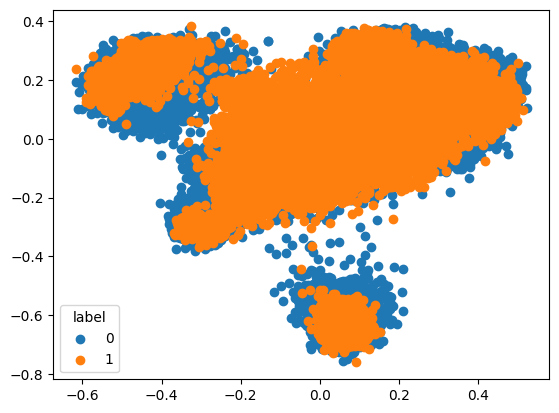

In [34]:
import matplotlib.pyplot as plt

for c in train['label'].unique():
    plt.scatter(embeddings_pca[train['label']==c, 0],
                embeddings_pca[train['label']==c, 1])
plt.legend(train['label'].unique(), title='label')

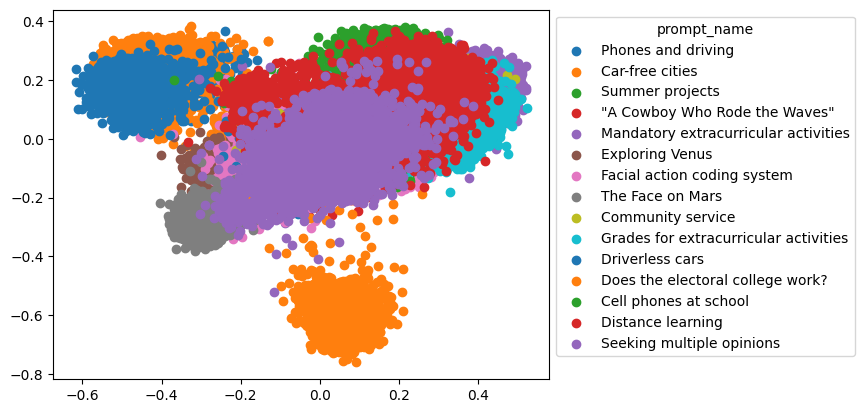

In [35]:
for c in train['prompt_name'].unique():
    plt.scatter(embeddings_pca[train['prompt_name']==c, 0],
                embeddings_pca[train['prompt_name']==c, 1])
plt.legend(train['prompt_name'].unique(), title='prompt_name', bbox_to_anchor=(1, 1.0))

## TSNE

In [36]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(4, 2)

In [37]:
data_index = np.random.choice(range(44868), 5000)

tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(embeddings[data_index])

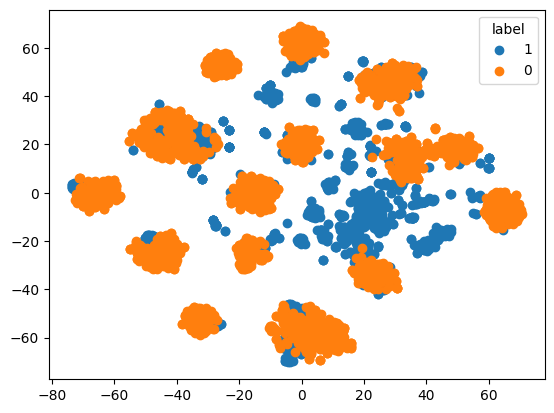

In [38]:
for c in train['label'].iloc[data_index].unique():
    plt.scatter(embeddings_tsne[train['label'].iloc[data_index]==c, 0],
                embeddings_tsne[train['label'].iloc[data_index]==c, 1])

plt.legend(train['label'].iloc[data_index].unique(), title='label')

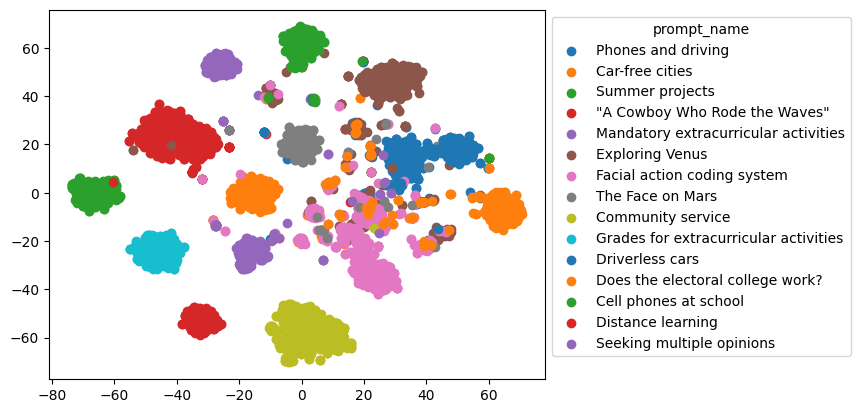

In [39]:
for c in train['prompt_name'].iloc[data_index].unique():
    plt.scatter(embeddings_tsne[train['prompt_name'].iloc[data_index]==c, 0],
                embeddings_tsne[train['prompt_name'].iloc[data_index]==c, 1])

plt.legend(train['prompt_name'].unique(), title='prompt_name', bbox_to_anchor=(1, 1.0))